In [1]:
import os.path
import pickle
import pandas as pd
import numpy as np

In [2]:
DATA_DIR = '/Users/ashfaq/Documents/traces/filtered_data_files'

dfs = [pd.read_parquet(os.path.join(DATA_DIR, f'data_{i}.parquet')) for i in range(3)]
combined_df = pd.concat(dfs, ignore_index=True)

In [3]:
len(combined_df)

3974252

In [4]:
(combined_df['u'] == combined_df['i']).sum()

1087893

In [5]:
combined_df['pair'] = combined_df.apply(lambda row: tuple([row['u'], row['i']]), axis=1)
interaction_counts = combined_df['pair'].value_counts()
interaction_dict = interaction_counts.to_dict()

In [6]:
unique_nodes = pd.unique(pd.concat([combined_df['u'], combined_df['i']]))
nodes = unique_nodes.tolist()

In [7]:
with open("data/embeddings_for_all_nodes.pkl", "rb") as file:
    embeddings = pickle.load(file)

In [8]:
embedding_distances = {}
for u, i in interaction_dict.keys():
    embedding_distances[(u, i)] = np.linalg.norm(embeddings[u] - embeddings[i])

In [9]:
interaction_counts_kv_not_same = {k: v for k, v in interaction_dict.items() if k[0] != k[1]}
embedding_distances_kv_not_same = {k: v for k, v in embedding_distances.items() if k[0] != k[1]}

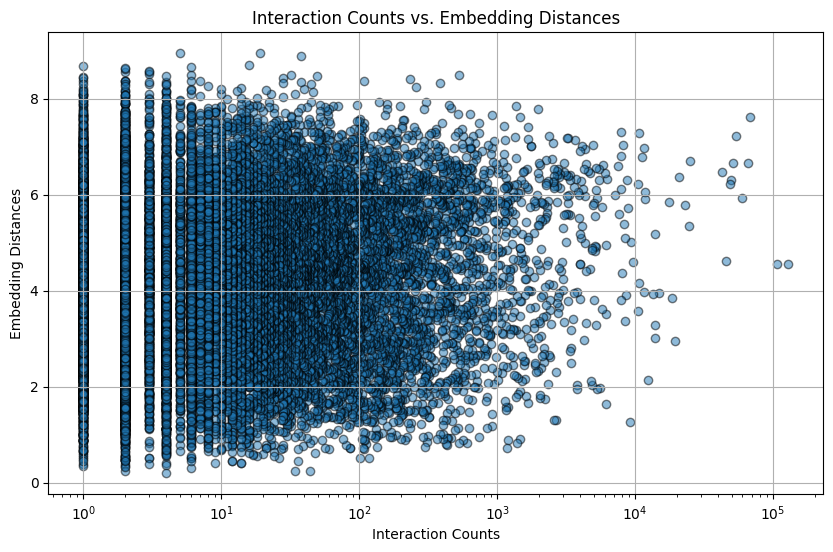

In [11]:
import matplotlib.pyplot as plt
import numpy as np

interaction_counts = np.array(list(interaction_counts_kv_not_same.values()))
emb_distances = np.array(list(embedding_distances_kv_not_same.values()))

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(interaction_counts, emb_distances, alpha=0.5, edgecolor='k')
plt.title("Interaction Counts vs. Embedding Distances")
plt.xlabel("Interaction Counts")
plt.ylabel("Embedding Distances")
plt.xscale('log')
plt.grid(True)
plt.savefig('plots/interactions_vs_embedding_distance_skipgram.png')
plt.show()

In [12]:
from scipy.stats import pearsonr

correlation, _ = pearsonr(interaction_counts, emb_distances)
print(f"Pearson Correlation: {correlation}")

Pearson Correlation: 0.037130639504209334
